In [2]:
import pandas as pd 
import numpy as np

from wordcloud import WordCloud 

In [3]:
df = pd.read_csv('/Users/jyotishkade/Desktop/Data Analytics/smsspamcollection/SMSSpamCollection.csv', 
                 sep = '\t', 
                 header = None,
                 names = ['label', 'text'])

In [4]:
df.shape

(5572, 2)

In [5]:
df.sample(10)

,label,text
2682,ham,I'm on da bus going home...
1046,ham,"Come round, it's ."
703,ham,What is important is that you prevent dehydrat...
1334,ham,"Oh... Icic... K lor, den meet other day..."
482,ham,"Yo carlos, a few friends are already asking me..."
3625,ham,No message..no responce..what happend?
4890,ham,"Japanese Proverb: If one Can do it, U too Can ..."
5119,ham,Lol for real. She told my dad I have cancer
2041,ham,You always make things bigger than they are
2093,ham,"Oh, my love, it's soooo good to hear from you...."


In [6]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jyotishkade/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

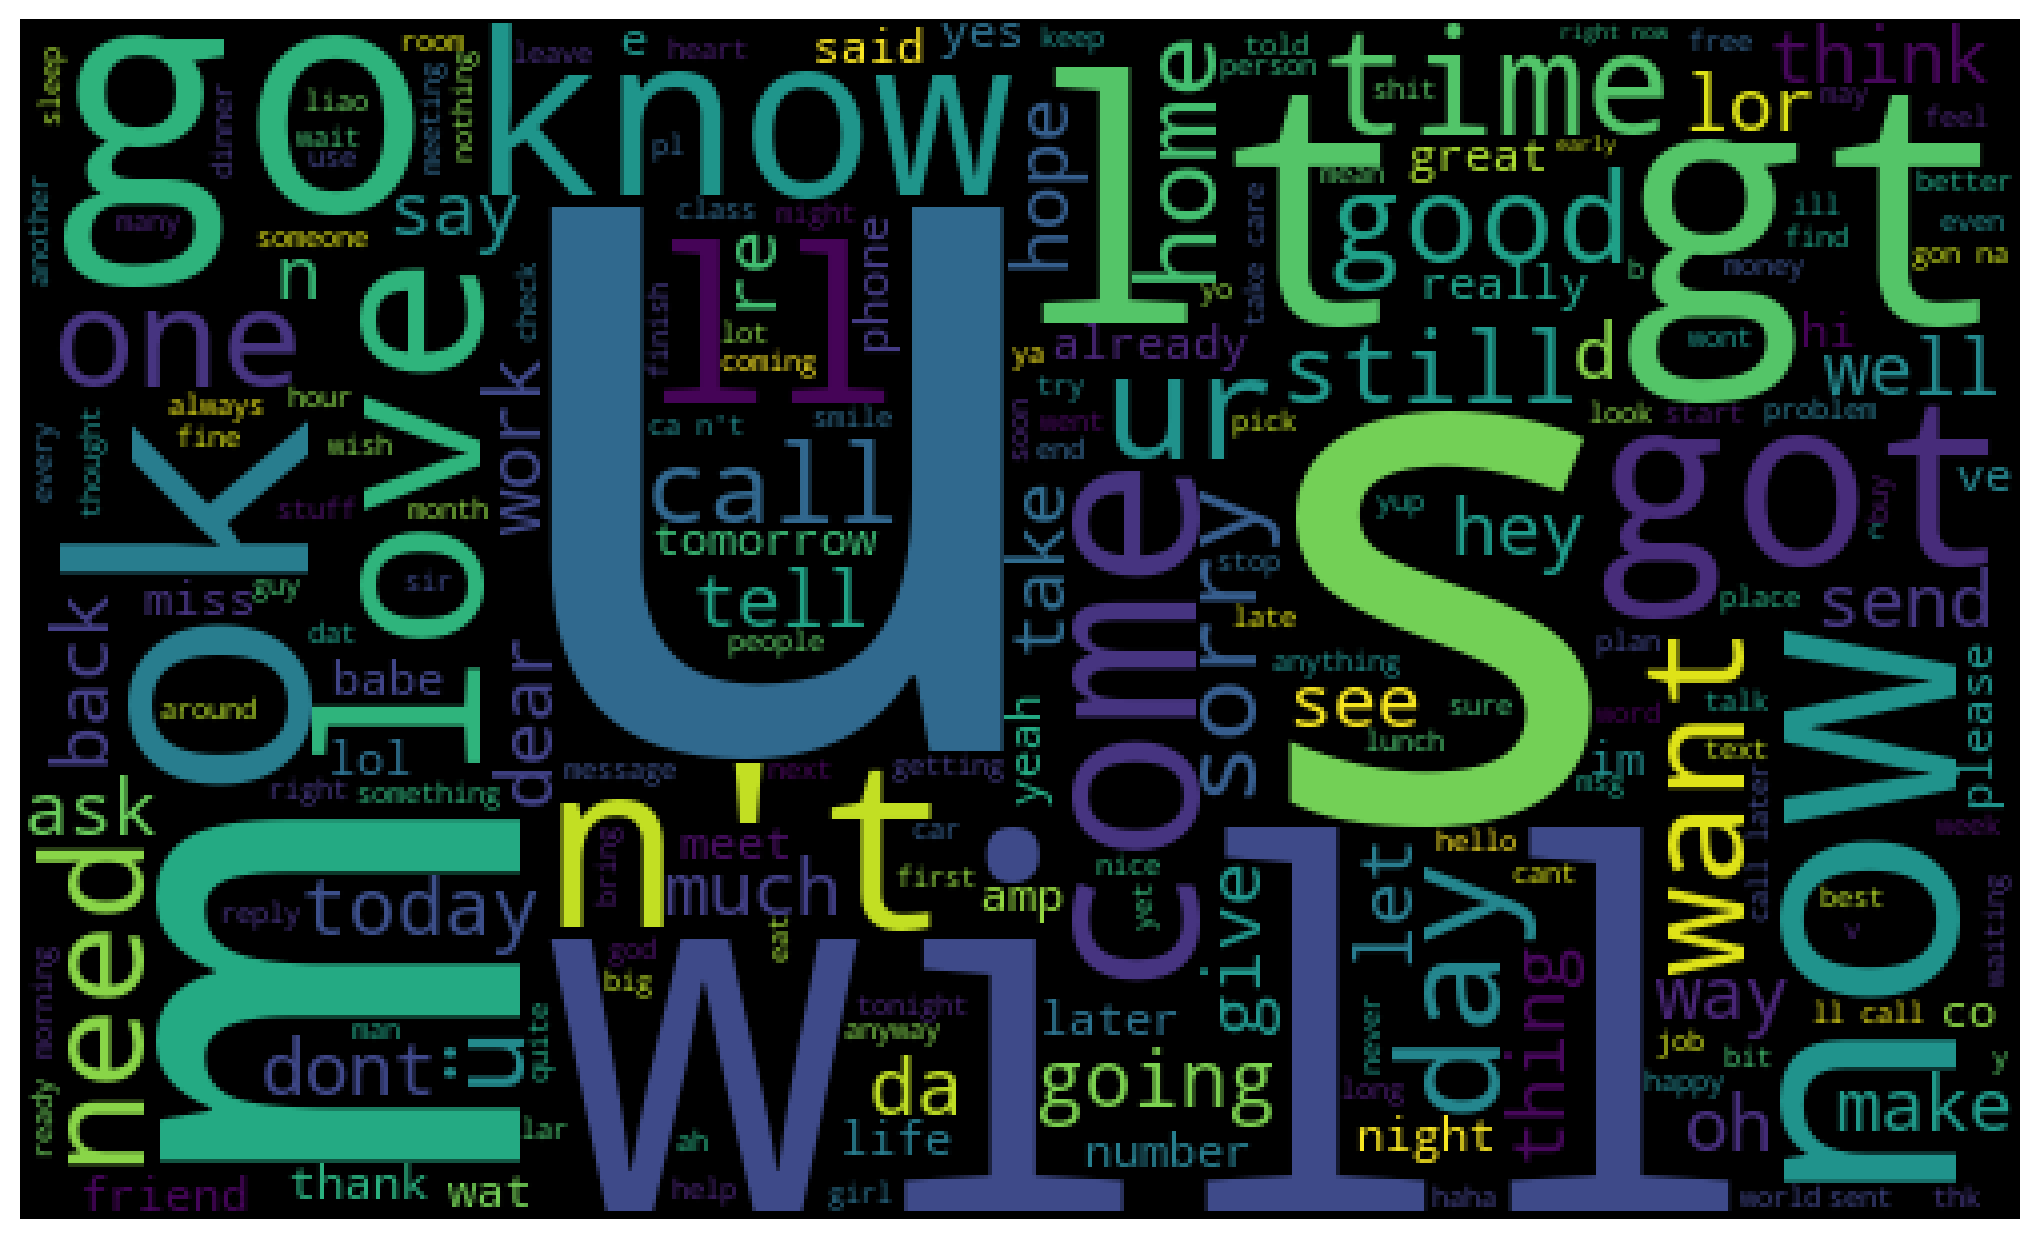

In [8]:
ham_words = ''

for val in df.query("label=='ham'")['text']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '
        
import matplotlib.pyplot as plt 

ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)
plt.figure( figsize=(10,8), facecolor='w', dpi = 200)
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

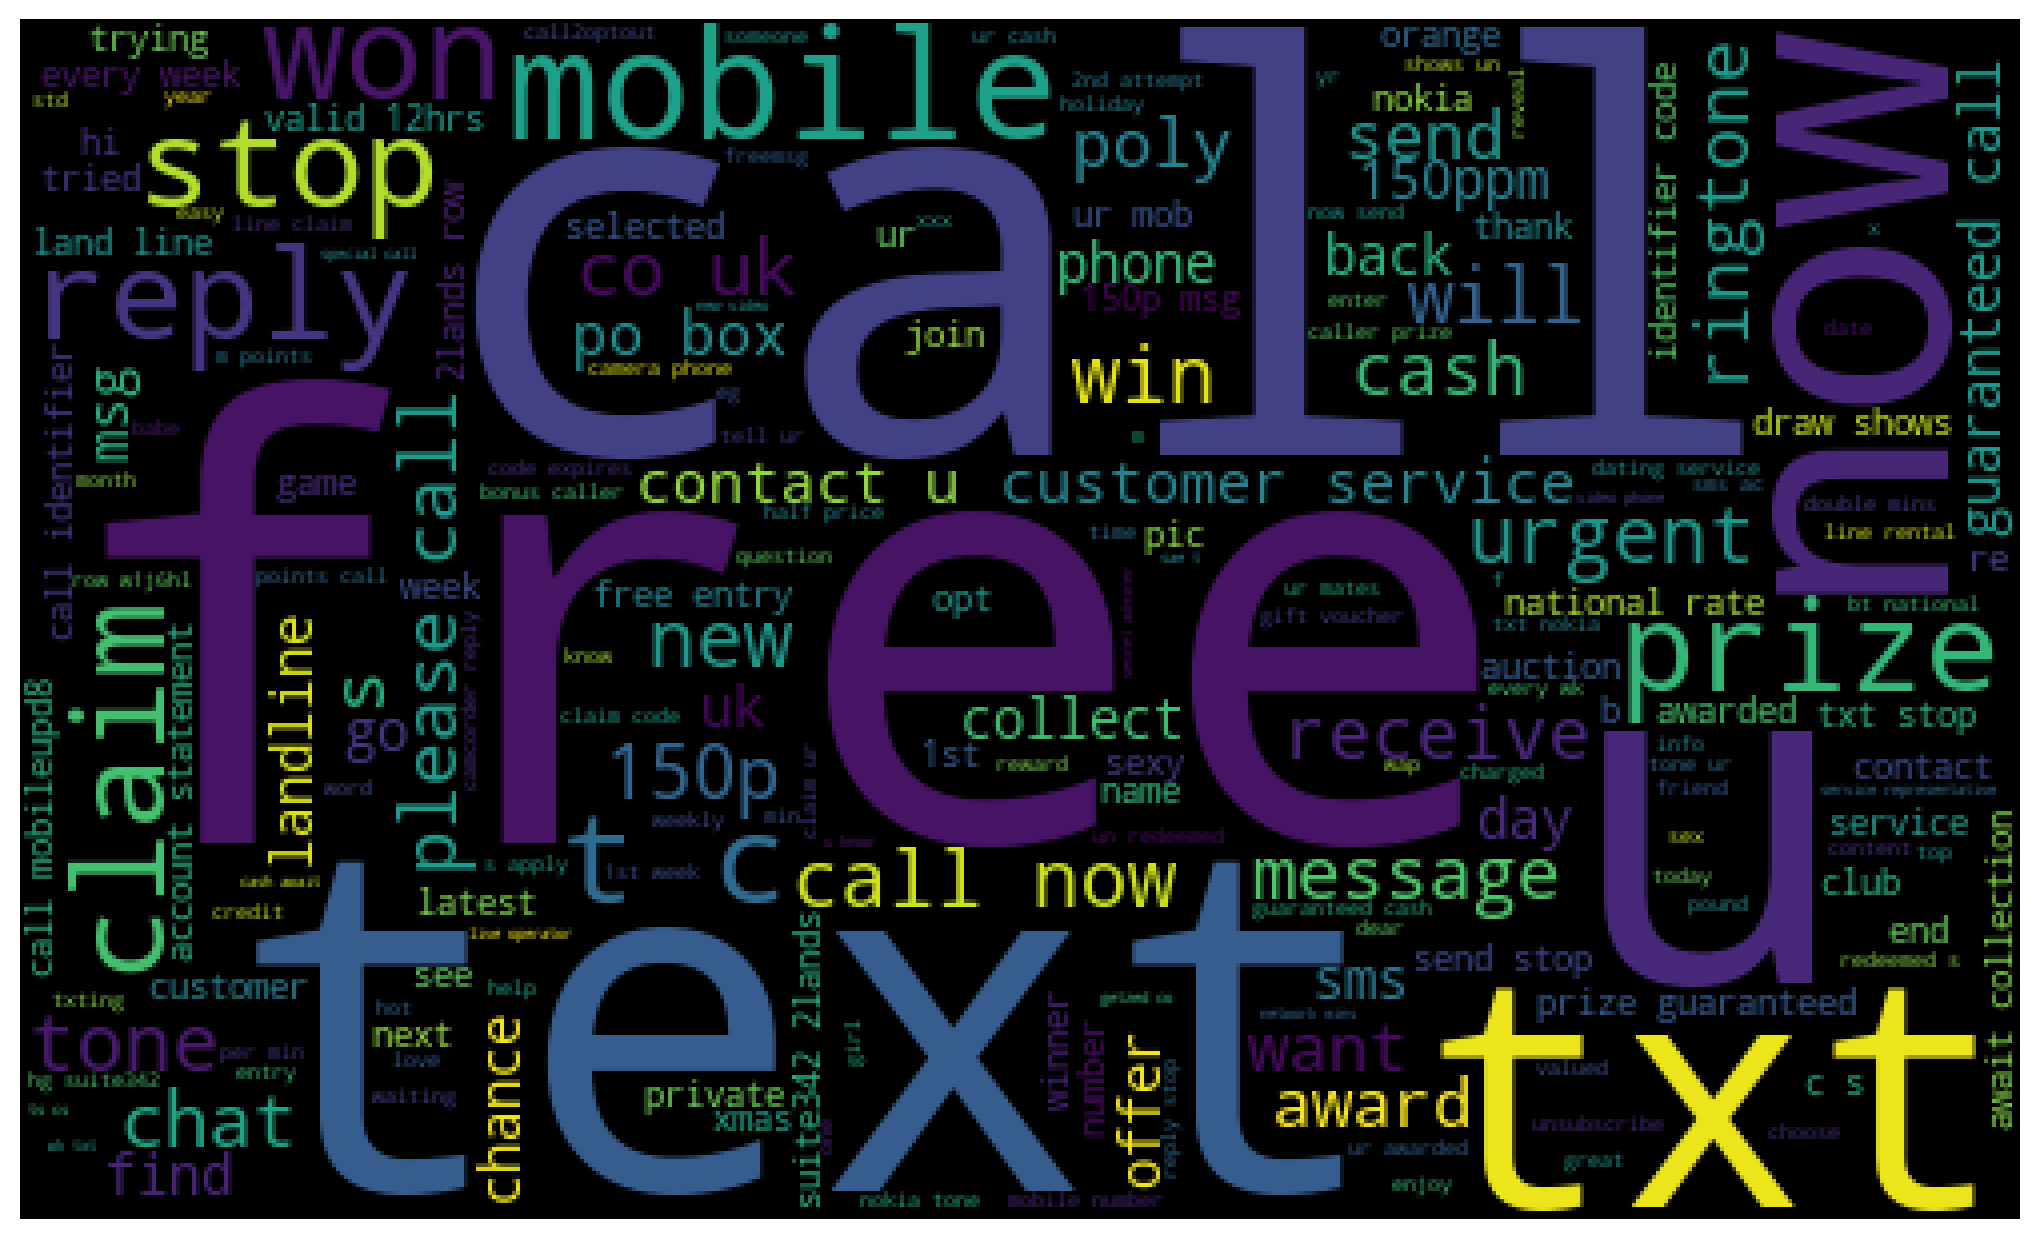

In [9]:
spam_words = ''

for val in df.query("label == 'spam'")['text']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
import matplotlib.pyplot as plt 

spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
plt.figure( figsize=(10,8), facecolor='w', dpi = 200)
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

TF - IDF

Term Frequency - frequency of words

Document Frequency (DF) - Frequency of documents

data.shape

doc1 = 'hi where are you now. I want to meet you' doc2 = 'hi this is 2nd message'

vocab = [this, is, a, new, message, hi, 2nd]

TF(this, doc1) = 1/5 TF(is, doc1) = 1/5

TF(you, doc1) = 2/10

DF(you, ) = no of documents containig word 'you'/total number of document = 1/2 IDF = log(2/1)

TF-IDF = TFIDF = 1/5LOG(2/1)

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
 
def remove_stopwords(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jyotishkade/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['text1'] = df['text'].apply(remove_stopwords)

In [16]:
df.sample(5)

,label,text,text1
3735,ham,"4 tacos + 1 rajas burrito, right?",4 tacos 1 rajas burrito right
1598,spam,URGENT! Your Mobile number has been awarded wi...,URGENT Mobile number awarded £2000 prize GUARA...
3536,ham,I'm at home. Please call,Im home Please call
5479,ham,Really do hope the work doesnt get stressful. ...,Really hope work doesnt get stressful gr8 day
1311,ham,"I.ll always be there, even if its just in spir...",Ill always even spirit Ill get bb soon trying ...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['text'])

#no. of documents/rows, vocabs
vectors.shape


(5572, 8713)

In [18]:
df.shape

(5572, 3)

In [19]:
df['text1'][1]

'Ok lar Joking wif u oni'

In [20]:
len(vectors.toarray()[1])

8713

In [21]:
vectors.toarray()[1][5995]

0.0

In [22]:
vectorizer.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [23]:
vectors.shape

(5572, 8713)

In [25]:
X = vectors.copy()
y = df['label']

In [26]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', penalty='l1')
model

LogisticRegression(penalty='l1', solver='liblinear')

In [28]:
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [29]:
pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
accuracy_score(y_test, pred)

0.9700956937799043

In [32]:
print(classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

         ham     0.9744    0.9918    0.9830       729
        spam     0.9362    0.8224    0.8756       107

    accuracy                         0.9701       836
   macro avg     0.9553    0.9071    0.9293       836
weighted avg     0.9695    0.9701    0.9693       836



In [33]:
newtext = ["win entry you get a free entry click here", 
           'hi, how are you, when are you coming',
           'hurrey!!! you have won a very big lottery! Call NOW to CLAIM THIS PRIZE']

x = vectorizer.transform(newtext)
model.predict(x)

array(['ham', 'ham', 'spam'], dtype=object)